<a href="https://colab.research.google.com/github/semaxspaul/semaxspaul_HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
# df.isnull().sum() # -> Check out null values per columns
# df.describe().transpose()
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

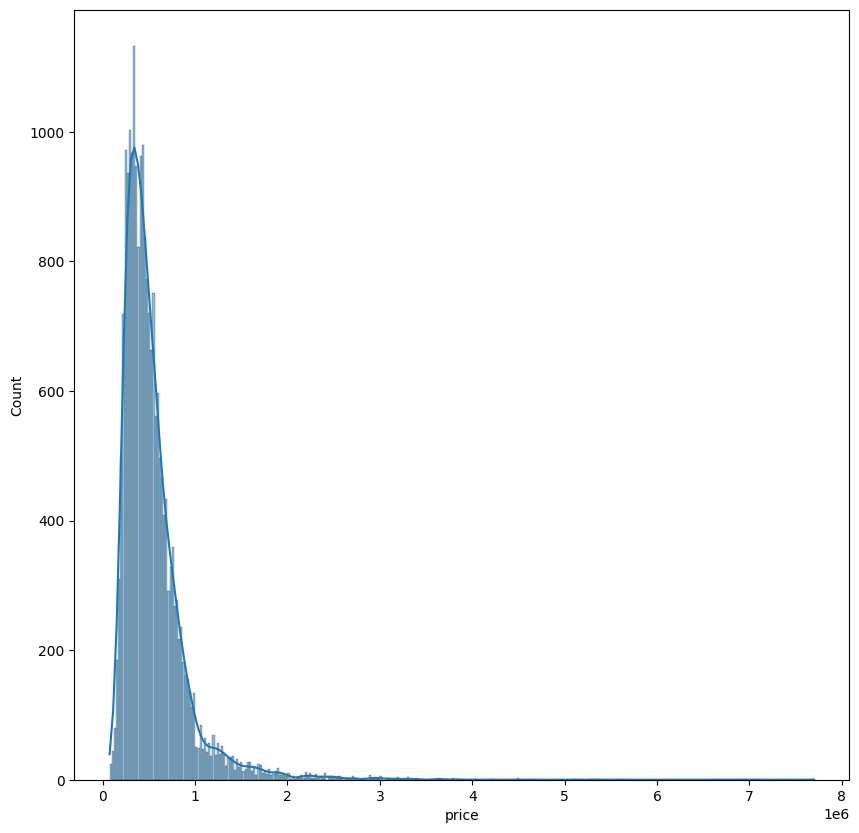

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df['price'], kde=True)

In [ ]:
df.corr()['price'].sort_values()

<ipython-input-60-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='long'>

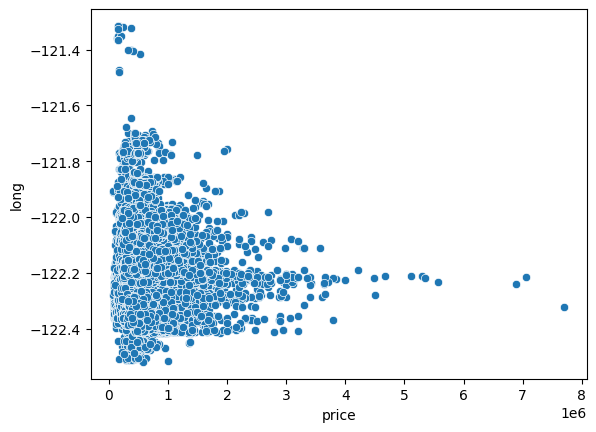

In [ ]:
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

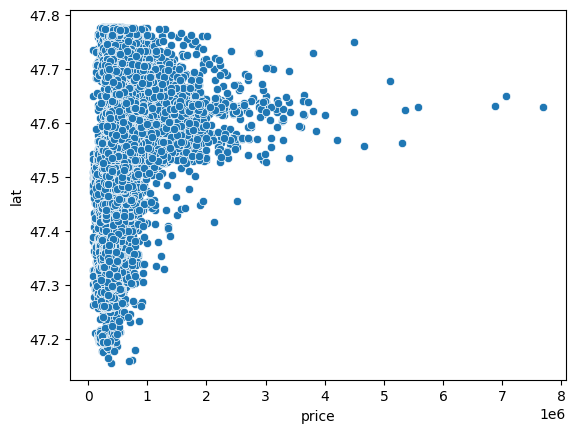

In [ ]:
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

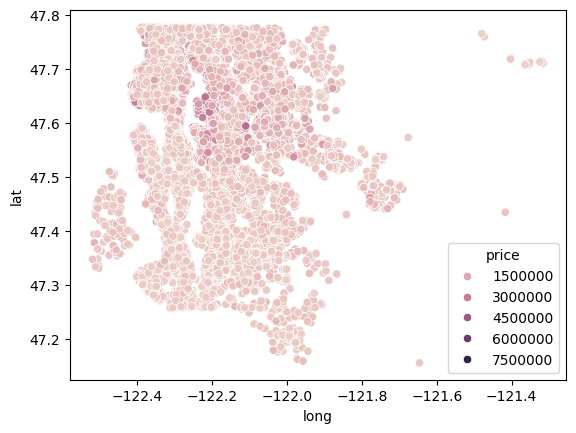

In [ ]:
sns.scatterplot(x='long', y='lat', hue='price', data=df)

In [ ]:
# Sort Data Frame to remove outliers
df.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860.0,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730.0,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430.0,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780.0,0,1942,0,98168,47.4739,-122.280,1700,10387


In [ ]:
non_top_one_percent = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

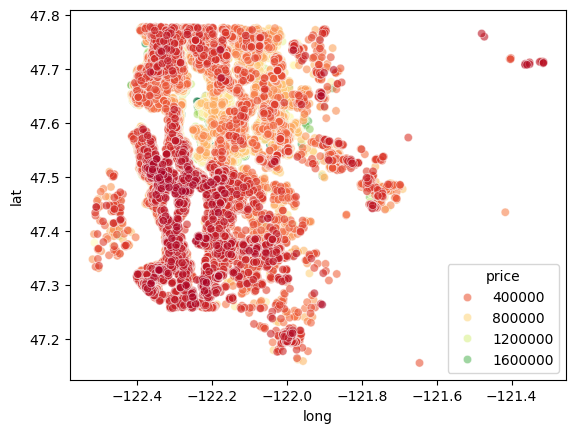

In [ ]:
sns.scatterplot(x='long', y='lat', hue='price',alpha=0.6, palette='RdYlGn', data=non_top_one_percent)

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [ ]:
# sns.boxplot(x='month')
df = df.drop('date', axis=1)

In [ ]:
df = df.drop('zipcode', axis=1)

In [ ]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda year: int(year>0))

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 414934007808.0000 - val_loss: 452993974272.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 410633961472.0000 - val_loss: 437429829632.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 355603677184.0000 - val_loss: 315948269568.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 183732977664.0000 - val_loss: 128700547072.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 95926149120.0000 - val_loss: 111721725952.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 92609142784.0000 - val_loss: 109698449408.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 90837671936.0000 - val_loss: 107597676544.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 88968609792.0000 - val_loss: 105283624960.0000
Epoch 9/400
119/119 

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

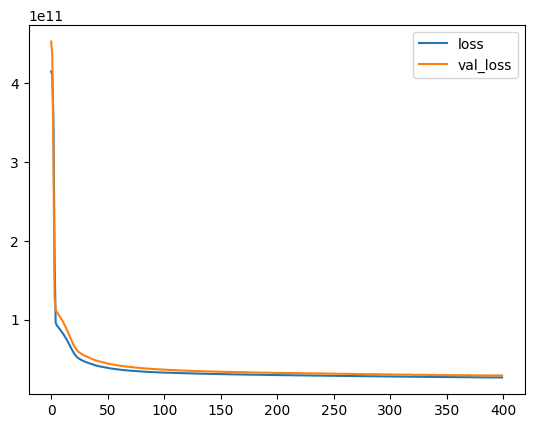

In [ ]:
losses.plot()

In [ ]:
predictions = model.predict(X_test)

203/203 [==============================] - 1s 3ms/step


In [ ]:
mean_absolute_error(y_test, predictions)

104005.65287282804

In [ ]:
df['price'].describe()

count    2.161100e+04
mean     5.400850e+05
std      3.671430e+05
min      7.500000e+04
25%      3.217250e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
explained_variance_score(y_test, predictions)

0.8092375331039265

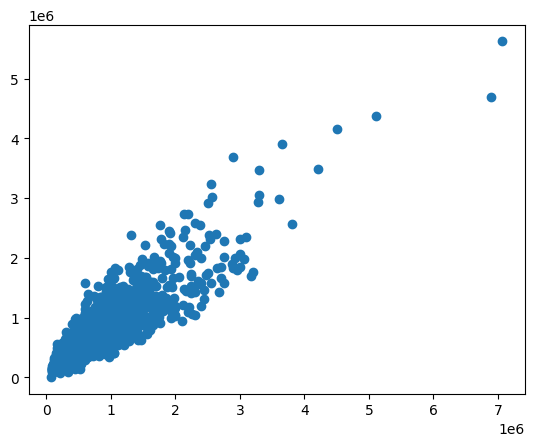

In [ ]:
plt.scatter(x=y_test, y=predictions)